In [51]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import datetime

In [52]:
data=pd.read_csv('AirtrafficA4.csv')
data['YEAR']=data['YEAR'].astype(str)
data["MONTH"] = data["MONTH"].str.strip()
month_mapping = {'JAN': 1,'FEB': 2,'MAR': 3,'APR': 4,'MAY': 5,'JUNE': 6,'JULY': 7,'AUG': 8,'SEP': 9,'OCT': 10,'NOV': 11,'DEC': 12}
data["MONTH"]=(data["MONTH"].map(month_mapping)).astype(str)
data['date']=pd.to_datetime((data['YEAR']+" "+data['MONTH']),format="%Y %m")
data.dropna(subset=["PASSENGERS CARRIED"], inplace=True)
data["PASSENGERS CARRIED"]=(data['PASSENGERS CARRIED'].str.replace(",","")).astype(int)
data.drop(columns=["AIRLINE", "YEAR", "MONTH",'TOTAL DEPARTURES','HOURS FLOWN','KILOMETRE FLOWN','AVAILABLE SEAT KILOMETRE (IN THOUSAND)', ' FREIGHT CARRIED (IN TONNE)','MAIL CARRIED (IN TONNE)'], inplace=True)
data.sort_values("date", inplace=True)
train= data[:]

In [64]:
model = ARIMA(train['PASSENGERS CARRIED'], order=(2, 1, 1), seasonal_order=(2, 1, 1, 7))
model_fit = model.fit()
#predictions
test_pred= model_fit.forecast(steps=12)
last_date = data['date'].iloc[-1]
predicted_dates = [last_date + datetime.timedelta(days=30*i) for i in range(1,13)]
forecast_data=pd.DataFrame({'dates':predicted_dates,'Pred entries':test_pred})


c:\Users\asyed\OneDrive\Desktop\C++\Data-DaVinci\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\asyed\OneDrive\Desktop\C++\Data-DaVinci\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\asyed\OneDrive\Desktop\C++\Data-DaVinci\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\asyed\OneDrive\Desktop\C++\Data-DaVinci\.venv\Lib

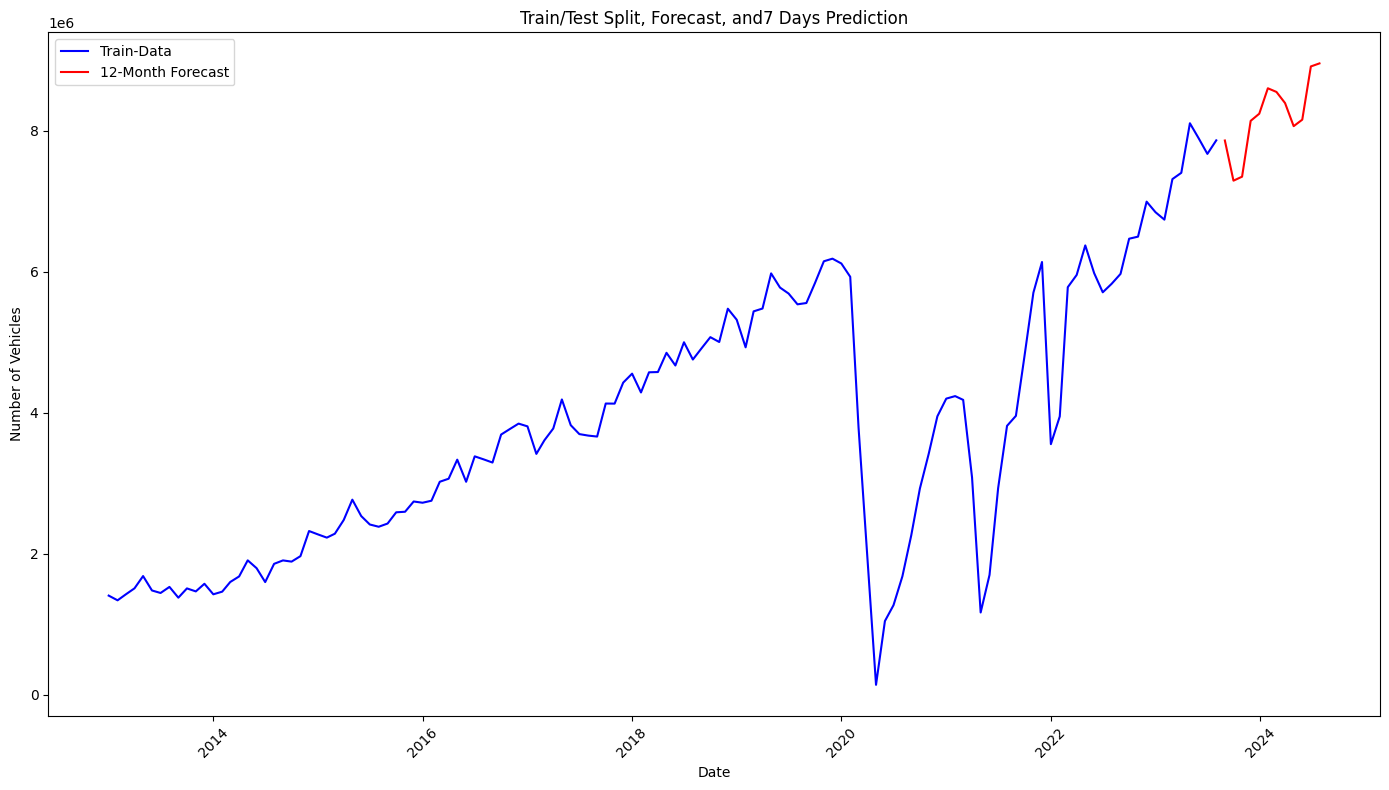

In [65]:
plt.figure(figsize=(14, 8))
plt.plot(train['date'].iloc[:], train['PASSENGERS CARRIED'].iloc[:], label='Train-Data', color='blue')
plt.plot(forecast_data['dates'], forecast_data['Pred entries'], label='12-Month Forecast', color='r')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.title('Train/Test Split, Forecast, and7 Days Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()